In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

loading precomputed roc-auc

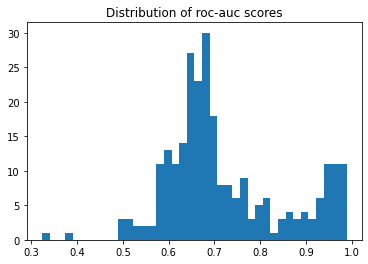

In [54]:
inf_data=pd.read_csv('logs/log_inference_rna_npi.txt', sep=' ', skiprows=1, usecols=[0,2,4], header=None)
inf_data.columns=['name','roc','loss']
plt.title('Distribution of roc-auc scores')
plt.hist(inf_data.roc, bins=40)
plt.show()

In [55]:
import json
import collections


with open('lists/rnaprot_polymer_info.json', 'r') as f:
    polymer_info=json.load(f)

pfam_info = collections.defaultdict(list)

for n in polymer_info:
    for k in polymer_info[n]:
        pfam_info[k].append(n)
        
pfam_list=list(pfam_info.keys())
pfam_len={x: len(list(set(pfam_info[x]))) for x in pfam_info.keys()}




In [56]:
inf_data['pfams']=np.full(inf_data.shape[0], None)
inf_data['uniq']=np.full(inf_data.shape[0], max(pfam_len.values()))

for i in inf_data.index:
    inf_data.pfams[i]=polymer_info.get(inf_data.iloc[i]['name'][:4])
    if len(inf_data.pfams[i])>0:
        inf_data.uniq[i]=max([pfam_len[x] for x in inf_data.pfams[i]])
inf_data

/home/domain/data/prog/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/domain/data/prog/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,name,roc,loss,pfams,uniq
0,7n0d_ABCDEFGH_TKPILJ:,0.612068,0.209235,"[PF06471, PF09401]",7
1,7onb_ABCDFIMNK_GH:,0.646677,0.201957,"[PF12874, PF07189, PF10433, PF04046, PF03660, ...",192
2,7m4u_bcdefghijklmnopqrstu_a:,0.665743,0.210149,"[PF00177, PF00366, PF00203, PF00312, PF00163, ...",154
3,7nun_1234_C:,0.854622,0.215971,"[PF00073, PF02226]",7
4,7njc_A_B:,0.666049,0.249491,[PF04146],15
...,...,...,...,...,...
258,2fmt_AB_CD:,0.649277,0.222822,"[PF00551, PF02911]",1
259,1qtq_A_B:,0.695836,0.211644,"[PF00749, PF03950]",26
260,1av6_A_B:,0.800764,0.191506,[PF01358],4
261,1cwp_ABC_DEF:,0.801548,0.189431,[PF01318],1


In [57]:
inf_data[inf_data.uniq==max(pfam_len.values())]

,name,roc,loss,pfams,uniq
50,6ifl_ABCDEFGH_IJ:,0.682949,0.187613,[],194
53,6een_ABCD_FGHI:,0.744919,0.248695,[],194
72,6b14_HL_R:,0.795943,0.170593,[],194
181,3agv_AB_SU:,0.578676,0.285511,[],194


In [58]:
a=np.load('preds/rna_npi_atomnet_vmp_roc.npy', allow_pickle=True)
print(len(a))

263


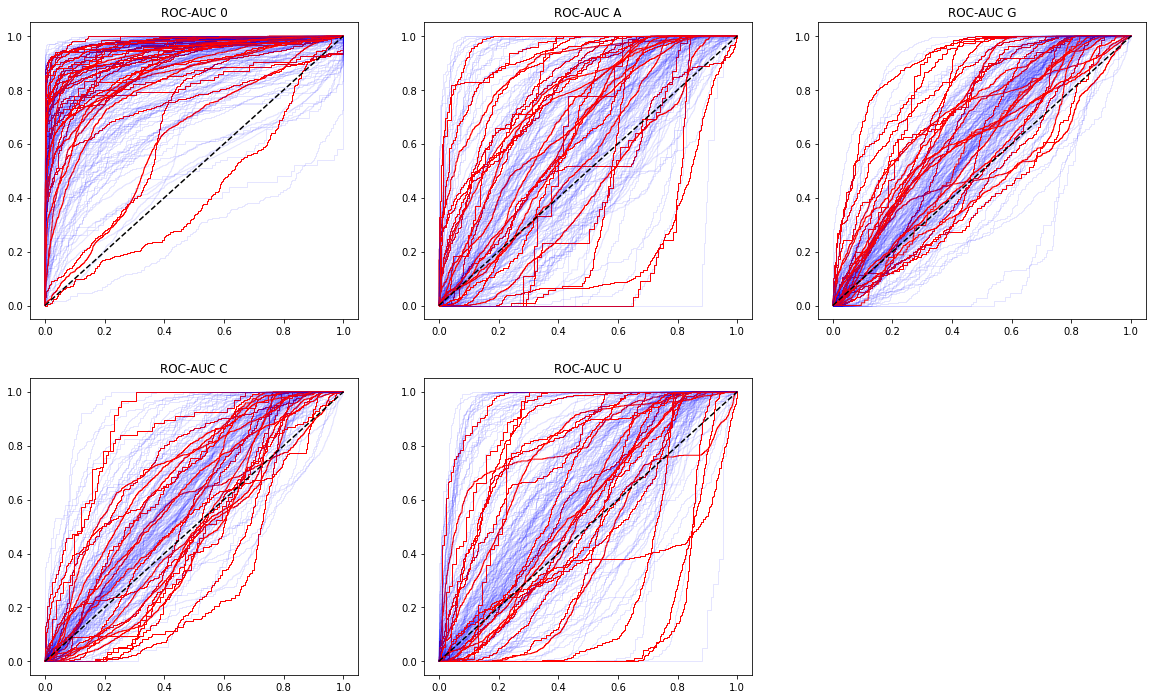

In [60]:
labels=['0','A','G','C','U']

if a.shape[2]==1:
    plt.figure(figsize=(20,12))

    plt.title('ROC curves for RNA test set')
    plt.plot([0, 1], [0, 1],linestyle="--", color='black')
    for k in range(a.shape[0]):
        if inf_data.iloc[k]['uniq'] <= 1:
            cl='red'
            ap=1
        else:
            cl='blue'  
            ap=0.2
        plt.plot(a[k,0,0],a[k,1,0],color=cl,linewidth=1,alpha=ap)
        plt.legend(['0.5','Non-unique pfams', 'Unique pfams' ])
    plt.show()
else:
    plt.figure(figsize=(20,12))
    for i in range(5):
        plt.subplot(231+i)
        for k in range(a.shape[0]):
            if inf_data.iloc[k]['uniq'] <= 1:
                cl='red'
                ap=1
            else:
                cl='blue'  
                ap=0.1
            plt.title('ROC-AUC '+labels[i])
            plt.plot(a[k,0,i],a[k,1,i],color=cl,linewidth=1,alpha=ap)
        plt.plot([0, 1], [0, 1],linestyle="--", color='black')

In [52]:
inf_data=inf_data[-inf_data.loss.isnull()]
print(inf_data.shape)

print('Correlation between roc-auc score and number of pfam families in the training set:',
      np.corrcoef(inf_data.roc,inf_data.uniq)[0,1])
print('Correlation between loss and number of pfam families in the training set:',
      np.corrcoef(inf_data.loss,inf_data.uniq)[0,1])
print('Correlation between loss and roc-auc:',np.corrcoef(inf_data.roc,inf_data.loss)[0,1])


(263, 5)
Correlation between roc-auc score and number of pfam families in the training set: -0.034225691488984133
Correlation between loss and number of pfam families in the training set: 0.008121400372147185
Correlation between loss and roc-auc: -0.8865378592080968


parse logfile

In [53]:
print(inf_data[inf_data.uniq==1].sort_values('roc', ascending=False).to_string())
print(len(inf_data[inf_data.uniq==1]))

                          name       roc      loss                        pfams  uniq
247        1knz_ABCDIJMN_WXYZ:  0.991602  0.011123                    [PF01665]     1
48                   6i2n_D_U:  0.989836  0.019327                    [PF00846]     1
120                4qm6_AB_CD:  0.983263  0.013222                    [PF13671]     1
28                 6lvr_CA_DB:  0.981739  0.014314                    [PF17177]     1
148                 4ii9_AB_C:  0.979967  0.013918                    [PF02388]     1
62                  6d12_AB_C:  0.966139  0.018904                    [PF08777]     1
57                   5zw4_A_D:  0.965866  0.016755                    [PF01596]     1
131                4o8j_AB_DE:  0.964248  0.015714           [PF05189, PF01137]     1
152            4g0a_ABCD_EFGH:  0.960564  0.020555                    [PF02509]     1
261              1cwp_ABC_DEF:  0.955012  0.022288                    [PF01318]     1
231                2a1r_AB_CD:  0.954047  0.022631    

In [35]:
for i in inf_data[inf_data.uniq==1].sort_values('roc', ascending=False).index:
    print(inf_data.name[i][:4])

1knz
6i2n
4qm6
6lvr
4ii9
6d12
5zw4
4o8j
4g0a
1cwp
2a1r
2gjw
6e0o
2qqp
2qux
6m7k
6rti
6yym
7kjt
6hau
2gje
3s4g
2fmt
3rw6
3vjr
3a2k
1u0b
3icq
6s0m
6scf
2b3j
6m6v
3rtj
7chd
3w1k
3moj
